In [1]:
import json
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
with open('../results/statements_scores_by_sentence.json') as file:
    statements_dict = json.load(file)

In [3]:
def logit(scores):
    '''
    scores::list
    Computes logit score for the list of input scores
    '''
    scores = [x for x in scores if isinstance(x, int) or isinstance(x, float)]
    hawk = sum([i for i in scores if i>0 ])
    dove = abs(sum([i for i in scores if i< 0 ]))
    
    logit_scaled = np.log((hawk+0.5)/(dove+0.5))

    return(logit_scaled)

In [33]:
year = []
mean_score = []
mean5_score = []
sd_score = []
sd5_score = []
logit_score = []

for key, value in statements_dict.items():
    scores = [x for x in value if isinstance(x, int) or isinstance(x, float)]
    year.append(key)
                        
    mean_score.append(np.mean(scores))                    # mean score
    
    sd_score.append(np.std(scores))                       # stdev score
    
    for i in range(2, len(scores) - 2):
        unit = scores[i]
        observations = scores[i - 2:i + 3]
        avg = np.mean(observations)
        sd = np.std(observations)
        mean5_score.append(avg)                           # 5 observation mean score
        sd5_score.append(sd)                              # 5 observation sd score
    

    
    logit_score.append(logit(value))                      # logit score
    
    

    
    
results = pd.DataFrame(list(zip(year, mean_score, mean5_score, sd_score, sd5_score, logit_score)), 
                      columns = ['year', 'mean_score', 'mean5_score', 'sd_score', 'sd5_score',  'logit_score'])

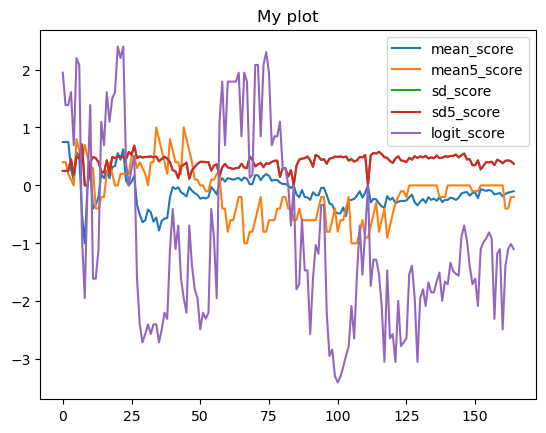

In [30]:
plot = results.plot(kind='line', title="My plot")

In [43]:
# results[['year','mean_score']].to_csv('../results/statement_mean.csv', index=False)
# results[['year','sd_score']].to_csv('../results/statement_sd.csv', index=False)
# results[['year','logit_score']].to_csv('../results/statement_logit.csv', index=False)